In [1]:
#My imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats

In [2]:
df = pd.read_csv('257k-gaiadr2-sources-with-photometry.csv')

In [3]:
#Drop irrelevant columns
X = df.drop(columns=["phot_g_mean_mag", "tycho2_id", "source_id"])

In [4]:
#Prediction vector
y = df['phot_g_mean_mag']

In [5]:
#Splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [6]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Polynomial regression model
#PS after some tuning, I realised a degree 2 (quadratic) polynomial fits the data the best. 3 is overfitting
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly.fit(X_poly_train, y_train)
lr.fit(X_poly_train, y_train)

LinearRegression()

In [8]:
#predict output
y_pred_test = lr.predict(X_test_poly)
y_pred_train = lr.predict(X_poly_train)

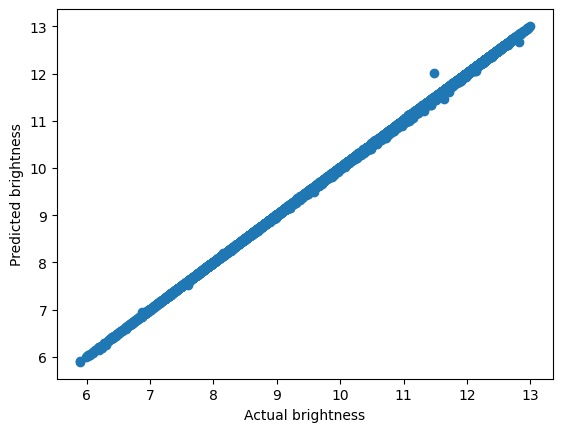

In [9]:
#Graph output
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

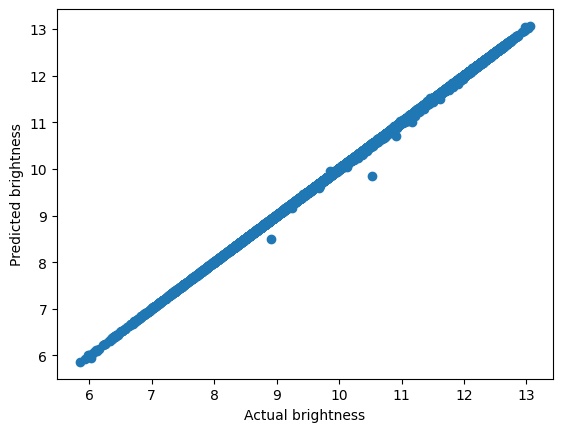

In [10]:
#Graph prediction
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [11]:
#loss functions (We get even less loss compared with linear regression!)
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MAPE


0.00018930766407996023

In [12]:
#Applied science part. Our null hypothesis is that the observed and expected frequencies have NO SIGNIFICANT DIFFERENCE
#Pearson's correlation test
r2_score(y_test, y_pred_test)
#The high correlation means the prediction and the actual frequencies are similar, which is what we want. Hence we accept the null hypothesis
#This is our highest R^2 score we have, and is super accurate.

0.999976747986906

In [13]:
#The F test
F = (np.var(y_pred_test))/(np.var(y_test))
F


1.0000363199253932

In [14]:
#P value (Assuming a two tailed test with alpha = 0.05, confidence interval = 0.95
p_value = stats.f.sf(F, 32, 32)
p_value
#Since our p value is greater than our alpha value, we can reject our alternate hypothesis, as the outputs are NOT significantly different. This works the other way around for our F test

0.4999593369691858